In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
import xgboost
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, balanced_accuracy_score, average_precision_score

In [2]:
# carregando os dados
df_ataque = pd.read_csv('arquivo_com_ataque.csv')

#checagem inicial visual dos dados
df_ataque.head()

,hora,ip,metodo,protocolo,hostname,uri,querystring,status_code,f0_,useragent,tamanho_request,tamanho_resposta,organizacao,pais,cidade,cookie_sessao,fingerprint1,fingerprint2,fingerprint3
0,2024-05-15 15:59:56 UTC,3.16.1a6931d1bd6093f2d7bd86a22fc657b9bba9a595b...,GET,HTTP/2.0,cab18057667df4595131dbc97b20b663c54b070d23e4e1...,/f276ac316f69b3f71eda737633acf69638452b0aee48a...,NaN,200,NaN,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_0...,196,NaN,AS16509 AMAZON-02,US,Columbus,1e0a93baad5dd480f42d5b95a51be36c0f86543e36c689...,b2bcc0e205d8ecf9af803794fb0075443f770e6849ee67...,844de68e6dea184cbfafec6f2dd46f1e82d3ff336b723a...,16af3145e3eee586af1ab917de45236567be83c62d0e45...
1,2024-05-15 15:59:33 UTC,177.91.6661493bb44e1df9a8bd020769c24a48a092a24...,GET,HTTP/2.0,cab18057667df4595131dbc97b20b663c54b070d23e4e1...,/8a5edab282632443219e051e4ade2d1d5bbc671c78105...,NaN,200,NaN,Mozilla/5.0 (iPhone; CPU iPhone OS 17_4_1 like...,274,NaN,AS263432 CORPORATIVA TELECOMUNICACOES EIRELI ME,BR,Barueri,4913706deec9c6962172970ddb26cec317abc6d2157887...,de928d0d6dff7b9793edb5c1522b6580b0b3e4ba0faff8...,c523025a20e743aaee34dd69e3c92f9e505d2d2ab4fedb...,d1ec27c5ea84f9aaa2fde750e00ed145404333f66a2431...
2,2024-05-15 15:59:13 UTC,177.95.366c247c96033ea60b63de9679e7406ba1bf121...,GET,HTTP/2.0,cab18057667df4595131dbc97b20b663c54b070d23e4e1...,/2c7f437a9bf6f7e32961284b70fa441969c5079c489b6...,NaN,200,https://5bb4687e3bd3d2cff1f382bf68949ef0d5d007...,Mozilla/5.0 (iPhone; CPU iPhone OS 17_4 like M...,27,1408.0,AS27699 TELEFONICA BRASIL S.A,BR,S\\xC3\\xA3o Paulo,9a619b8a0b6d46d36df93d0e379347119c812e1a6e8950...,de928d0d6dff7b9793edb5c1522b6580b0b3e4ba0faff8...,c523025a20e743aaee34dd69e3c92f9e505d2d2ab4fedb...,d1ec27c5ea84f9aaa2fde750e00ed145404333f66a2431...
3,2024-05-15 15:59:13 UTC,177.95.366c247c96033ea60b63de9679e7406ba1bf121...,GET,HTTP/2.0,cab18057667df4595131dbc97b20b663c54b070d23e4e1...,/5d31f4d8c72923216e3cfd77b33991457650cce55b196...,NaN,200,https://5bb4687e3bd3d2cff1f382bf68949ef0d5d007...,Mozilla/5.0 (iPhone; CPU iPhone OS 17_4 like M...,35,2102.0,AS27699 TELEFONICA BRASIL S.A,BR,S\\xC3\\xA3o Paulo,9a619b8a0b6d46d36df93d0e379347119c812e1a6e8950...,de928d0d6dff7b9793edb5c1522b6580b0b3e4ba0faff8...,c523025a20e743aaee34dd69e3c92f9e505d2d2ab4fedb...,d1ec27c5ea84f9aaa2fde750e00ed145404333f66a2431...
4,2024-05-15 15:59:14 UTC,177.95.366c247c96033ea60b63de9679e7406ba1bf121...,GET,HTTP/2.0,cab18057667df4595131dbc97b20b663c54b070d23e4e1...,/1119a502d8ba182b00c4bde713a20d3ddb846ec39e29d...,?a074e1c1c7f2fdae1bb7bdf401d7b2c0fc4e0b19549d2...,200,https://5bb4687e3bd3d2cff1f382bf68949ef0d5d007...,Mozilla/5.0 (iPhone; CPU iPhone OS 17_4 like M...,46,53501.0,AS27699 TELEFONICA BRASIL S.A,BR,S\\xC3\\xA3o Paulo,04f93a511891dca068013e071a08e0a8832c1f803c9247...,de928d0d6dff7b9793edb5c1522b6580b0b3e4ba0faff8...,c523025a20e743aaee34dd69e3c92f9e505d2d2ab4fedb...,d1ec27c5ea84f9aaa2fde750e00ed145404333f66a2431...


In [3]:
df_ataque.head(3)

,hora,ip,metodo,protocolo,hostname,uri,querystring,status_code,f0_,useragent,tamanho_request,tamanho_resposta,organizacao,pais,cidade,cookie_sessao,fingerprint1,fingerprint2,fingerprint3
0,2024-05-15 15:59:56 UTC,3.16.1a6931d1bd6093f2d7bd86a22fc657b9bba9a595b...,GET,HTTP/2.0,cab18057667df4595131dbc97b20b663c54b070d23e4e1...,/f276ac316f69b3f71eda737633acf69638452b0aee48a...,NaN,200,NaN,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_0...,196,NaN,AS16509 AMAZON-02,US,Columbus,1e0a93baad5dd480f42d5b95a51be36c0f86543e36c689...,b2bcc0e205d8ecf9af803794fb0075443f770e6849ee67...,844de68e6dea184cbfafec6f2dd46f1e82d3ff336b723a...,16af3145e3eee586af1ab917de45236567be83c62d0e45...
1,2024-05-15 15:59:33 UTC,177.91.6661493bb44e1df9a8bd020769c24a48a092a24...,GET,HTTP/2.0,cab18057667df4595131dbc97b20b663c54b070d23e4e1...,/8a5edab282632443219e051e4ade2d1d5bbc671c78105...,NaN,200,NaN,Mozilla/5.0 (iPhone; CPU iPhone OS 17_4_1 like...,274,NaN,AS263432 CORPORATIVA TELECOMUNICACOES EIRELI ME,BR,Barueri,4913706deec9c6962172970ddb26cec317abc6d2157887...,de928d0d6dff7b9793edb5c1522b6580b0b3e4ba0faff8...,c523025a20e743aaee34dd69e3c92f9e505d2d2ab4fedb...,d1ec27c5ea84f9aaa2fde750e00ed145404333f66a2431...
2,2024-05-15 15:59:13 UTC,177.95.366c247c96033ea60b63de9679e7406ba1bf121...,GET,HTTP/2.0,cab18057667df4595131dbc97b20b663c54b070d23e4e1...,/2c7f437a9bf6f7e32961284b70fa441969c5079c489b6...,NaN,200,https://5bb4687e3bd3d2cff1f382bf68949ef0d5d007...,Mozilla/5.0 (iPhone; CPU iPhone OS 17_4 like M...,27,1408.0,AS27699 TELEFONICA BRASIL S.A,BR,S\\xC3\\xA3o Paulo,9a619b8a0b6d46d36df93d0e379347119c812e1a6e8950...,de928d0d6dff7b9793edb5c1522b6580b0b3e4ba0faff8...,c523025a20e743aaee34dd69e3c92f9e505d2d2ab4fedb...,d1ec27c5ea84f9aaa2fde750e00ed145404333f66a2431...


In [4]:
# visualizando as variáveis do problema
df_ataque.columns

Index(['hora', 'ip', 'metodo', 'protocolo', 'hostname', 'uri', 'querystring',
       'status_code', 'f0_', 'useragent', 'tamanho_request',
       'tamanho_resposta', 'organizacao', 'pais', 'cidade', 'cookie_sessao',
       'fingerprint1', 'fingerprint2', 'fingerprint3'],
      dtype='object')

In [5]:
# status code talvez seja o tipo de requisição: há 14 tipos
df_ataque['status_code'].nunique()

14

In [6]:
# Haveria algum tipo de requisição mais frequentemente associado ao tráfego malicioso ?
df_ataque['status_code'].unique()

array([200, 304, 302, 404, 206, 301, 499, 403, 500, 405, 408, 414, 502,
       416], dtype=int64)

In [7]:
#Checando por informações gerais os dados: datatypes, tamanho, dados usentes, etc
df_ataque.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348864 entries, 0 to 348863
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   hora              348864 non-null  object 
 1   ip                348864 non-null  object 
 2   metodo            348864 non-null  object 
 3   protocolo         348864 non-null  object 
 4   hostname          348864 non-null  object 
 5   uri               348864 non-null  object 
 6   querystring       83233 non-null   object 
 7   status_code       348864 non-null  int64  
 8   f0_               313136 non-null  object 
 9   useragent         347372 non-null  object 
 10  tamanho_request   348864 non-null  int64  
 11  tamanho_resposta  256033 non-null  float64
 12  organizacao       348864 non-null  object 
 13  pais              348864 non-null  object 
 14  cidade            325891 non-null  object 
 15  cookie_sessao     348864 non-null  object 
 16  fingerprint1      34

In [8]:
# Mapeando e quantificando dados indefinidos
df_ataque.isnull().sum()

hora                     0
ip                       0
metodo                   0
protocolo                0
hostname                 0
uri                      0
querystring         265631
status_code              0
f0_                  35728
useragent             1492
tamanho_request          0
tamanho_resposta     92831
organizacao              0
pais                     0
cidade               22973
cookie_sessao            0
fingerprint1          1078
fingerprint2          1078
fingerprint3          1078
dtype: int64

In [9]:
# Dados indefinidos em percentagem
df_ataque.isnull().sum() / len(df_ataque) * 100

hora                 0.000000
ip                   0.000000
metodo               0.000000
protocolo            0.000000
hostname             0.000000
uri                  0.000000
querystring         76.141706
status_code          0.000000
f0_                 10.241240
useragent            0.427674
tamanho_request      0.000000
tamanho_resposta    26.609510
organizacao          0.000000
pais                 0.000000
cidade               6.585088
cookie_sessao        0.000000
fingerprint1         0.309003
fingerprint2         0.309003
fingerprint3         0.309003
dtype: float64

In [10]:
# - A qtidade de nulls na variável "querystring" é preocupante, esses dados não podem ser removidos porque representam 76% dos dados. 
# - Provavelmente uma parte desses dados é recuperável, mas demandaria um tempo que não existe no momento

#### 1o task: identificar as anomalias de tráfego ao longo do tempo que, por serem suspeitas, possam ser classificadas como maliciosas
#### OBS.: A princípio não se sabe se são ou não requisições maliciosas, apenas que apresentam suspeita. Essa confirmação seria feita  à posterioi de alguma forma

In [11]:
# tratando a variável temporal
df_ataque['hora']

0         2024-05-15 15:59:56 UTC
1         2024-05-15 15:59:33 UTC
2         2024-05-15 15:59:13 UTC
3         2024-05-15 15:59:13 UTC
4         2024-05-15 15:59:14 UTC
                   ...           
348859    2024-05-15 15:13:45 UTC
348860    2024-05-15 15:03:17 UTC
348861    2024-05-15 15:18:51 UTC
348862    2024-05-15 15:22:19 UTC
348863    2024-05-15 15:18:54 UTC
Name: hora, Length: 348864, dtype: object

In [12]:
df_ataque.shape

(348864, 19)

In [13]:
# parece que todos se referem a mesma data: 2024-05-15
df_ataque['hora'].str[:10]

0         2024-05-15
1         2024-05-15
2         2024-05-15
3         2024-05-15
4         2024-05-15
             ...    
348859    2024-05-15
348860    2024-05-15
348861    2024-05-15
348862    2024-05-15
348863    2024-05-15
Name: hora, Length: 348864, dtype: object

In [14]:
# Transformando o dado de "hora" para o datatype adequado
df_ataque['hora'] = pd.to_datetime(df_ataque['hora'], errors='coerce')

In [15]:
# Colocando a variável "hora" como index
df_ataque.set_index('hora', inplace=True)

In [16]:
# Agrupando por IP
data_grouped = df_ataque.groupby('ip').resample('T').size().unstack(0).fillna(0)

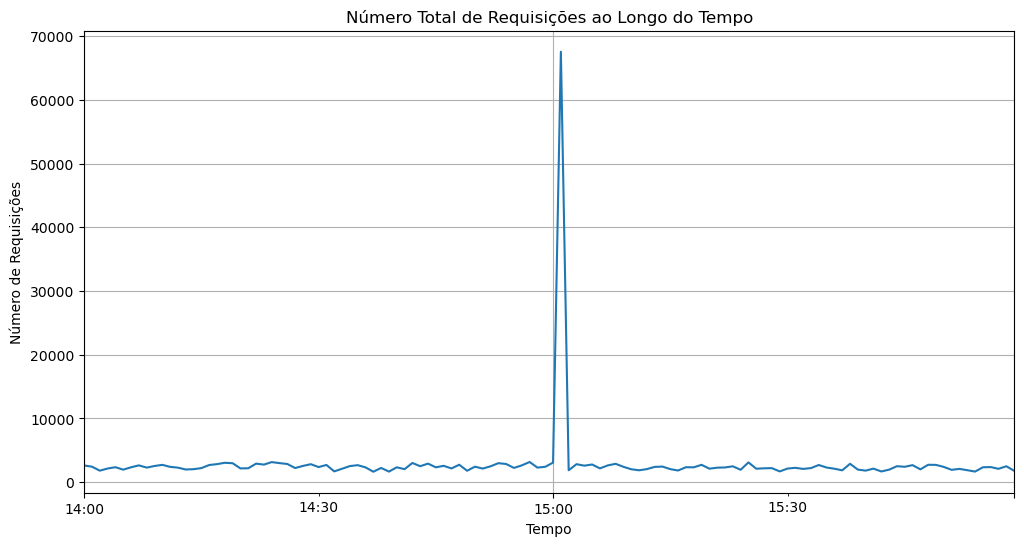

In [17]:
# Plotar o número de requisições agrupadas por IP ao longo do tempo
plt.figure(figsize=(12, 6))
data_grouped.sum(axis=1).plot()
plt.title('Número Total de Requisições ao Longo do Tempo')
plt.xlabel('Tempo')
plt.ylabel('Número de Requisições')
plt.grid(True)
plt.show()

In [18]:
# - O gráfico acima mostra uma anomalia de pico de volume de requisições no tempo, mas a janela de tempo está muito aberta

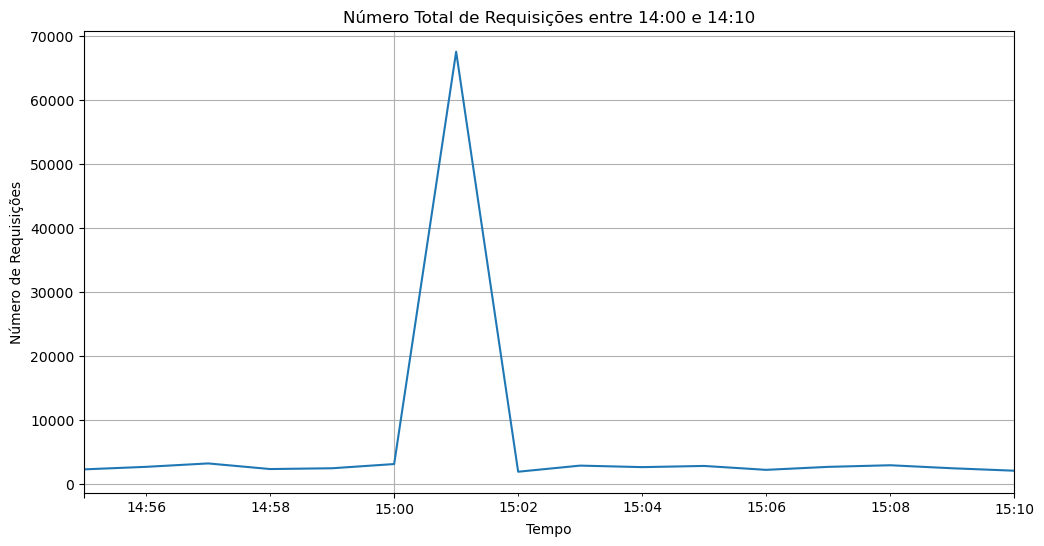

In [19]:
# Filtrar os dados para o intervalo de tempo desejado (entre 14:50 e 15:05)
dado_janelado = data_grouped.between_time('14:55', '15:10')

# Plotar o número de requisições agrupadas por IP ao longo do tempo
plt.figure(figsize=(12, 6))
dado_janelado.sum(axis=1).plot()
plt.title('Número Total de Requisições entre 14:00 e 14:10')
plt.xlabel('Tempo')
plt.ylabel('Número de Requisições')
plt.grid(True)
plt.show()

- Uma vez estabelecida a janela de tempo (15:00-15:02) com anomalia de tráfego através do volume de requests, é possível fazer uma análise em função da mesma

- Quais são as ocorrências mais características desse período em relação aos outros ? Esse é o norte da exploração a seguir

### BASELINE: será estabelecida aqui uma baseline: o modelo mais simples possível para se identificar tráfego malicioso

In [20]:
# Definindo uma variável para identificar o tráfego possivelmente malicioso
df_ataque_malicioso = df_ataque.between_time('15:00', '15:02')

df_ataque_malicioso['trafego'] = 1

C:\Users\Dell\AppData\Local\Temp\ipykernel_2352\2839287107.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ataque_malicioso['trafego'] = 1


In [21]:
filtrado_antes = df_ataque[:'2024-05-15 14:59:59']
filtrado_apos = df_ataque['2024-05-15 15:03:00':]

# Concatenar os dados filtrados antes e depois da janela de tempo
filtrado_agrupado = pd.concat([filtrado_antes, filtrado_apos])

In [22]:
filtrado_agrupado['trafego'] = 0

In [23]:
df_ataque = pd.concat([df_ataque_malicioso, filtrado_agrupado])

In [24]:
df_ataque['trafego']

hora
2024-05-15 15:00:57+00:00    1
2024-05-15 15:00:23+00:00    1
2024-05-15 15:01:37+00:00    1
2024-05-15 15:00:06+00:00    1
2024-05-15 15:00:20+00:00    1
                            ..
2024-05-15 15:13:45+00:00    0
2024-05-15 15:03:17+00:00    0
2024-05-15 15:18:51+00:00    0
2024-05-15 15:22:19+00:00    0
2024-05-15 15:18:54+00:00    0
Name: trafego, Length: 347021, dtype: int64

- A partir daqui torna-se um problema de classificação

In [25]:
# Entendendo o tipo de trafego em função de outras variáveis
df_ataque.groupby(['metodo','trafego']).count()

ip  protocolo  hostname     uri  querystring  \
metodo     trafego                                                     
GET        0        270150     270150    270150  270150        81027   
           1         70543      70543     70543   70543         1496   
HEAD       0           723        723       723     723            3   
           1            13         13        13      13            0   
OPTIONS    0             4          4         4       4            0   
POST       0          5466       5466      5466    5466           67   
           1           120        120       120     120            0   
XCGFULLBAN 0             2          2         2       2            0   

                    status_code     f0_  useragent  tamanho_request  \
metodo     trafego                                                    
GET        0             270150  236856     268701           270150   
           1              70543   68418      70516            70543   
HEAD       0                723     682        720              723   
           1                 13      13         13               13   
OPTIONS    0                  4       4          4                4   
POST       0               5466    5463       5466             5466   
           1                120     120        120              120   
XCGFULLBAN 0                  2       0          0                2   

                    tamanho_resposta  organizacao    pais  cidade  \
metodo     trafego                                                  
GET        0                  207062       270150  270150  257727   
           1                   47512        70543   70543   60549   
HEAD       0                     150          723     723     705   
           1                       4           13      13      13   
OPTIONS    0                       0            4       4       0   
POST       0                       0         5466    5466    5004   
           1                      33          120     120     110   
XCGFULLBAN 0                       2            2       2       2   

                    cookie_sessao  fingerprint1  fingerprint2  fingerprint3  
metodo     trafego                                                           
GET        0               270150        269237        269237        269237  
           1                70543         70532         70532         70532  
HEAD       0                  723           576           576           576  
           1                   13            11            11            11  
OPTIONS    0                    4             4             4             4  
POST       0                 5466          5466          5466          5466  
           1                  120           120           120           120  
XCGFULLBAN 0                    2             2             2             2

In [26]:
# Entendendo o tipo de trafego em função de outras variáveis
df_ataque.groupby(['status_code','trafego']).count()

ip  metodo  protocolo  hostname     uri  querystring  \
status_code trafego                                                             
200         0        264754  264754     264754    264754  264754        77958   
            1         60258   60258      60258     60258   60258         1414   
206         0          1206    1206       1206      1206    1206            0   
            1            11      11         11        11      11            0   
301         0          1351    1351       1351      1351    1351           32   
            1            15      15         15        15      15            0   
302         0          2388    2388       2388      2388    2388          164   
            1            38      38         38        38      38            3   
304         0          2965    2965       2965      2965    2965          546   
            1            73      73         73        73      73           21   
403         0            61      61         61        61      61            0   
404         0          2011    2011       2011      2011    2011         1912   
            1            44      44         44        44      44           43   
405         0             2       2          2         2       2            0   
408         0            13      13         13        13      13            0   
414         0             1       1          1         1       1            1   
416         0             1       1          1         1       1            0   
499         0          1583    1583       1583      1583    1583          482   
            1         10237   10237      10237     10237   10237           15   
500         0             7       7          7         7       7            2   
502         0             2       2          2         2       2            0   

                        f0_  useragent  tamanho_request  tamanho_resposta  \
status_code trafego                                                         
200         0        236314     263307           264754            204033   
            1         58419      60231            60258             40970   
206         0          1196       1206             1206              1206   
            1            11         11               11                11   
301         0           433       1346             1351              1060   
            1             6         15               15                13   
302         0           623       2388             2388               573   
            1            20         38               38                16   
304         0          2402       2965             2965                 0   
            1            45         73               73                 6   
403         0             0         61               61                 0   
404         0           625       2011             2011                76   
            1            29         44               44                14   
405         0             0          0                2                 2   
408         0            13         13               13                12   
414         0             1          1                1                 1   
416         0             1          1                1                 1   
499         0          1390       1583             1583               250   
            1         10021      10237            10237              6519   
500         0             5          7                7                 0   
502         0             2          2                2                 0   

                     organizacao    pais  cidade  cookie_sessao  fingerprint1  \
status_code trafego                                                             
200         0             264754  264754  253870         264754        264754   
            1              60258   60258   52278          60258         60258   
206         0               1206    1206    1117           1206  

- Há uma diferenciação clara entre os quantitativos de cada uma das variáveis em função do tipo de tráfego, anomalo/malicioso ou normal. Naturalmente essa desigualdade pode ser mero reflexo da amostragem, mas a principio para um modelo de base (baseline) praticamente todas as
variáveis poderiam ser consideradas


- Num segundo momento seria possível selecionar e excluir variáveis de forma mais rigorosa

#### Preparando os dados para o baseline

In [27]:
df_baseline = df_ataque.reset_index().drop(columns=['hora','ip'])

df_baseline

,metodo,protocolo,hostname,uri,querystring,status_code,f0_,useragent,tamanho_request,tamanho_resposta,organizacao,pais,cidade,cookie_sessao,fingerprint1,fingerprint2,fingerprint3,trafego
0,GET,HTTP/1.1,cab18057667df4595131dbc97b20b663c54b070d23e4e1...,/786fdcf7bfbde4ed112e0f4563cf05a89bda9019277dd...,NaN,301,https://1ad8d6297d3e3da89cd4f565ed434f8c880a18...,Mozilla/5.0 (Linux; Android 11; SM-A107M Build...,1355,166.0,AS10429 TELEFONICA BRASIL S.A,BR,Guaratinguet\\xC3\\xA1,0d97f79bd43ee3e56442d5ced146cf1df0337634762a39...,NaN,NaN,NaN,1
1,GET,HTTP/1.1,cab18057667df4595131dbc97b20b663c54b070d23e4e1...,/786fdcf7bfbde4ed112e0f4563cf05a89bda9019277dd...,NaN,301,https://1ad8d6297d3e3da89cd4f565ed434f8c880a18...,Mozilla/5.0 (Linux; Android 11; moto g(9) play...,1448,166.0,AS10429 TELEFONICA BRASIL S.A,BR,Guaratinguet\\xC3\\xA1,36f156bc18241bf947c8c28fc49919c35ace2ec5b65b58...,NaN,NaN,NaN,1
2,GET,HTTP/1.1,cab18057667df4595131dbc97b20b663c54b070d23e4e1...,/53612ed108ce9c13cbde87d9136336a812584a4f8f2cd...,NaN,301,NaN,ias-va/3.3 (former https://www.admantx.com + h...,283,166.0,AS30083 AS-30083-GO-DADDY-COM-LLC,US,St Louis,86a22357da255837412a3bfd5226965778a839b287ba7e...,NaN,NaN,NaN,1
3,GET,HTTP/1.1,cab18057667df4595131dbc97b20b663c54b070d23e4e1...,/2842919e6cad940f38c02066be34cbbe358db3895db8a...,NaN,301,NaN,ias-or/3.3 (former https://www.admantx.com + h...,309,166.0,AS30083 AS-30083-GO-DADDY-COM-LLC,US,St Louis,3f13c209b8c8715b2f03daa32a5475b5315951fec59c24...,NaN,NaN,NaN,1
4,GET,HTTP/1.1,cab18057667df4595131dbc97b20b663c54b070d23e4e1...,/dc8f3172861d71473c79e77b6f87b3cf2ef9b709a2252...,NaN,301,NaN,Mozilla/5.0 (Linux; Android 6.0.1; Nexus 5X Bu...,496,166.0,AS15169 GOOGLE,US,NaN,013ae31bfcdc93d3b3eb174650c65077b8168dea529c32...,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347016,GET,HTTP/2.0,cab18057667df4595131dbc97b20b663c54b070d23e4e1...,/316556f0cdc8d53b2f22e704409502c65d64ccafbbcd4...,?9e3f22a258b438a0216edcbf2c9cd1c116c0e0c44cc40...,404,NaN,facebookexternalhit/1.1 (+http://www.facebook....,109,NaN,AS32934 FACEBOOK,US,New Albany,7bf81b32f38df4483365ebb2c2edd064d6b56f2b90067b...,9710c3260893e2c61b671fdaaa0b9a46d0f642daf5cc7c...,810e35a68f82763861e5689c9e67d5de1ceaf481183940...,526e3b7a9fd17dd9328613ca10abdbdd9758557cf0b996...,0
347017,GET,HTTP/2.0,cab18057667df4595131dbc97b20b663c54b070d23e4e1...,/316556f0cdc8d53b2f22e704409502c65d64ccafbbcd4...,?2db84f96261f18ee2200e577e525acd0893d37bdcae18...,404,NaN,facebookexternalhit/1.1 (+http://www.facebook....,112,NaN,AS32934 FACEBOOK,US,Forest City,5e2617372b6557fb14458fa9106753a63dcf827e5f934a...,9710c3260893e2c61b671fdaaa0b9a46d0f642daf5cc7c...,810e35a68f82763861e5689c9e67d5de1ceaf481183940...,526e3b7a9fd17dd9328613ca10abdbdd9758557cf0b996...,0
347018,GET,HTTP/2.0,cab18057667df4595131dbc97b20b663c54b070d23e4e1...,/316556f0cdc8d53b2f22e704409502c65d64ccafbbcd4...,?4007a8012c10747833a87354594896432073ac31ecaac...,404,https://355094672638df73ea9aaea60a7d182894f091...,facebookexternalhit/1.1 (+http://www.facebook....,1547,NaN,AS32934 FACEBOOK,US,Forest City,5f2f48f313203061db86784bbf5c2e9a88edfc99df5742...,9710c3260893e2c61b671fdaaa0b9a46d0f642daf5cc7c...,810e35a68f82763861e5689c9e67d5de1ceaf481183940...,526e3b7a9fd17dd9328613ca10abdbdd9758557cf0b996...,0
347019,GET,HTTP/2.0,cab18057667df4595131dbc97b20b663c54b070d23e4e1...,/316556f0cdc8d53b2f22e704409502c65d64ccafbbcd4...,?4007a8012c10747833a87354594896432073ac31ecaac...,404,https://ef472e4d5363f58b82956aac6e9eabfdb35ae8...,facebookexternalhit/1.1 (+http://www.facebook....,1639,NaN,AS32934 FACEBOOK,US,Forest City,61f1583a9a2279675fd47cab6f5c24a0efbee9716c573e...,9710c3260893e2c61b671fdaaa0b9a46d0f642daf5cc7c...,810e35a68f82763861e5689c9e67d5de1ceaf481183940...,526e3b7a9fd17dd9328613ca10abdbdd9758557cf0b996...,0


In [28]:
df_baseline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 347021 entries, 0 to 347020
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   metodo            347021 non-null  object 
 1   protocolo         347021 non-null  object 
 2   hostname          347021 non-null  object 
 3   uri               347021 non-null  object 
 4   querystring       82593 non-null   object 
 5   status_code       347021 non-null  int64  
 6   f0_               311556 non-null  object 
 7   useragent         345540 non-null  object 
 8   tamanho_request   347021 non-null  int64  
 9   tamanho_resposta  254763 non-null  float64
 10  organizacao       347021 non-null  object 
 11  pais              347021 non-null  object 
 12  cidade            324110 non-null  object 
 13  cookie_sessao     347021 non-null  object 
 14  fingerprint1      345948 non-null  object 
 15  fingerprint2      345948 non-null  object 
 16  fingerprint3      34

In [29]:
# Separar a variável target
X = df_baseline.drop(columns='trafego')
y = df_baseline['trafego']

# Identificar colunas numéricas e categóricas
num_cols = X.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X.select_dtypes(include=['object']).columns

In [30]:
# Pipeline para colunas numéricas
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Preencher NaNs com a média
    ('scaler', StandardScaler())  # Padronizar
])

# Pipeline para colunas categóricas
cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Preencher NaNs com a moda (dados mais frequentes)
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # Codificação one-hot
])

In [31]:
# Combinar ambos os pipelines
preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_cols),
    ('cat', cat_pipeline, cat_cols)
])

In [32]:
# Criar um pipeline completo
model_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', RandomForestClassifier(n_estimators=10, random_state=42, n_jobs=-1))  # Modelo de exemplo
])

In [33]:
# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinar o modelo
model_pipeline.fit(X_train, y_train)

# Avaliar o modelo
score = model_pipeline.score(X_test, y_test)
print(f'Score do modelo: {score}')

Score do modelo: 0.9955478711908364


- COnsiderações: 1. O número de arvores teve de ser reduzido porque mesmo com processamento distribuido entre os núcleos não foi possível rodar com mais de 10 árvores.
2. Dado o desbalanceamento entre as classes o resultado do score não tem muito significado
3. Abaixo será aplicado um parâmetro para compensar as classes desbalanceadas de trafego malicioso/normal

In [34]:
# Criar um pipeline completo
model_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', RandomForestClassifier(n_estimators=10, random_state=42, n_jobs=-1, class_weight='balanced'))  # Modelo de exemplo
])

In [35]:
# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinar o modelo
model_pipeline.fit(X_train, y_train)

# Avaliar o modelo
score = model_pipeline.score(X_test, y_test)
print(f'Score do modelo: {score}')

Score do modelo: 0.9955622793746848


In [38]:
y_pred = model_pipeline.predict(X_test)

In [40]:
precision_score = precision_score(y_pred, y_test)
print(f'Score do modelo: {score}')

Score do modelo: 0.9955622793746848


In [41]:
recall_score = recall_score(y_pred, y_test)
print(f'Score do modelo: {score}')

Score do modelo: 0.9955622793746848


In [42]:
f1 = f1_score(y_test, y_pred, average='binary')
f1 

0.9889779559118237

In [44]:
roc_auc = roc_auc_score(y_test, y_pred)
roc_auc

0.9902028594732172

In [45]:
balanced_acc = balanced_accuracy_score(y_test, y_pred)
balanced_acc

0.9902028594732172

In [46]:
avg_precision = average_precision_score(y_test, y_pred)
avg_precision

0.981957300712937

In [47]:
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[55279,    43],
       [  265, 13818]], dtype=int64)

## FIM